# Email Spam/Ham Prediction

### Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Spambase Dataset
Read training and test data from specified path

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.33,0.00,0.67,0.0,0.22,0.00,0.00,0.00,0.44,0.11,...,0.000,0.157,0.0,0.392,0.176,0.078,2.606,75,391,1
1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.145,0.291,0.000,2.500,11,45,1
2,0.08,0.08,0.76,0.0,0.85,1.02,0.25,0.17,0.59,0.08,...,0.000,0.065,0.0,0.403,0.117,0.013,7.484,669,1407,1
3,0.05,0.05,0.40,0.0,0.34,0.00,0.00,0.00,0.57,0.05,...,0.019,0.099,0.0,0.099,0.079,0.009,4.881,95,1313,1
4,0.00,0.00,0.84,0.0,0.56,0.00,0.00,0.56,0.00,0.00,...,0.000,0.278,0.0,0.046,0.000,0.000,1.661,6,118,1


### Extract Xs and Labels from train and test datsets

In [4]:
X_train = train_data.values[:, :-1]
Y_train = train_data.values[:, -1]

X_test = test_data.values[:, :-1]
Y_test = test_data.values[:, -1]

### Normalize Dataset using StandardScaler

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1. Logistic Regression Model (Simple)

In [6]:
model_simple = LogisticRegression(max_iter=500)
model_simple.fit(X_train_scaled, Y_train)
y_pred_simple = model_simple.predict(X_test_scaled)

print("Accuracy (Simple):", accuracy_score(Y_test, y_pred_simple))
print("Classification Report (Simple):\n", classification_report(Y_test, y_pred_simple))

Accuracy (Simple): 0.9250814332247557
Classification Report (Simple):
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       558
         1.0       0.92      0.88      0.90       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.92       921



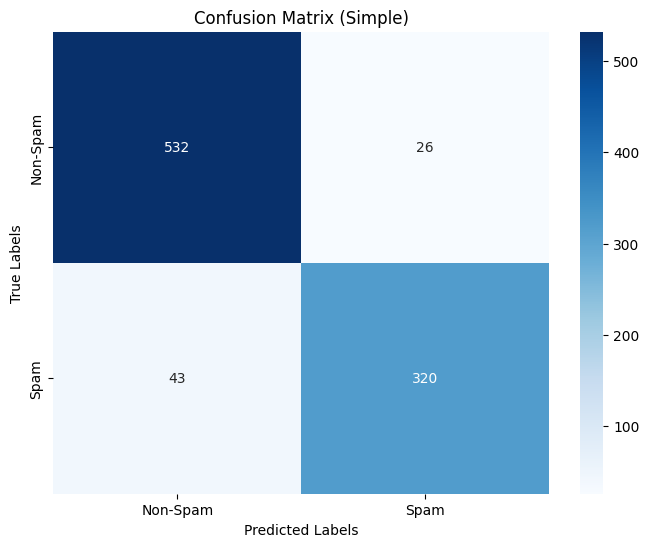

In [7]:
conf_matrix = confusion_matrix(Y_test, y_pred_simple)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Simple)')
plt.show()

## 2. Logistic Regression Model (Weighted Loss)
using a "balanced" class weight aims to address imbalances in the dataset, where certain classes may be underrepresented. By adjusting the loss function based on class frequencies, the model becomes more sensitive to minority classes, potentially improving performance on imbalanced datasets.

In [8]:
model_weighted = LogisticRegression(max_iter=5000, class_weight='balanced')
model_weighted.fit(X_train, Y_train)
y_pred_weighted = model_weighted.predict(X_test)


print("Accuracy (Weighted Loss):", accuracy_score(Y_test, y_pred_weighted))
print("Classification Report (Weighted Loss):\n", classification_report(Y_test, y_pred_weighted))

Accuracy (Weighted Loss): 0.9272529858849077
Classification Report (Weighted Loss):
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       558
         1.0       0.91      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



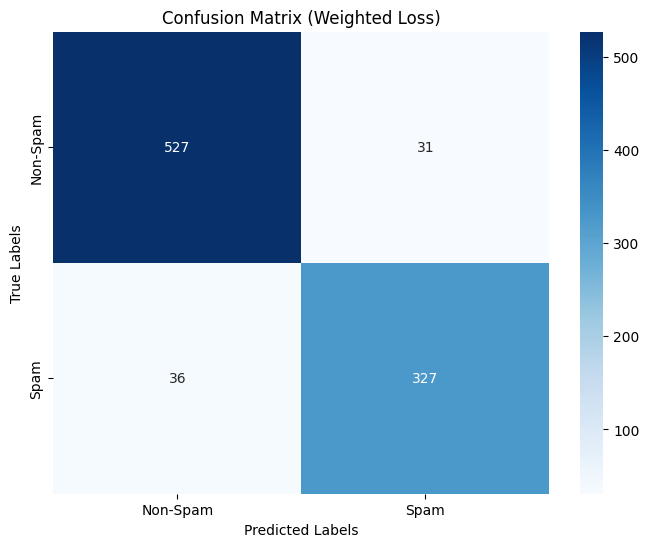

In [9]:
conf_matrix = confusion_matrix(Y_test, y_pred_weighted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Weighted Loss)')
plt.show()

## 3. Logistic Regression Model (Oversampling)
Oversampling is a technique used to mitigate the impact of class imbalance, where one or more classes have significantly fewer instances than others. By generating synthetic samples for the minority class(es), oversampling aims to balance the class distribution, allowing the model to better learn from the minority class and potentially improving overall model performance, especially in scenarios with imbalanced classes.

In [10]:
from imblearn.over_sampling import RandomOverSampler

# Oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, Y_train)

# Logistic Regression with oversampled data
model_oversampling = LogisticRegression(max_iter=2500)
model_oversampling.fit(X_resampled, y_resampled)
y_pred_oversampling = model_oversampling.predict(X_test)


print("Accuracy (Oversampling):", accuracy_score(Y_test, y_pred_oversampling))
print("Classification Report (Oversampling):\n", classification_report(Y_test, y_pred_oversampling))

Accuracy (Oversampling): 0.9261672095548317
Classification Report (Oversampling):
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       558
         1.0       0.91      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



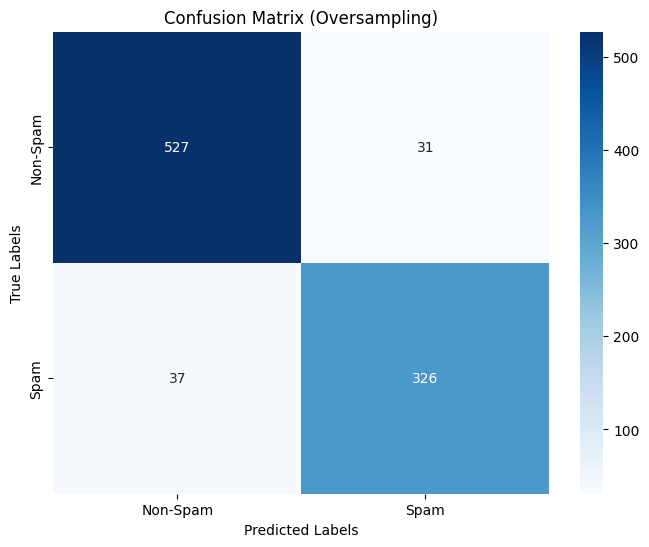

In [11]:
conf_matrix = confusion_matrix(Y_test, y_pred_oversampling)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Oversampling)')
plt.show()

## 4. Logistic Regression Model (Undersampling)
Undersampling is a technique used to address class imbalance by reducing the number of instances in the majority class. This is done to prevent the model from being biased toward the majority class and to ensure that the model can learn patterns from the minority class as well. Undersampling is suitable when the majority class has a significant number of instances, and the imbalance needs to be rectified to improve model performance, particularly in scenarios with imbalanced classes.

In [12]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, Y_train)

# Logistic Regression with undersampled data
model_undersampling = LogisticRegression(max_iter = 2000)
model_undersampling.fit(X_resampled, y_resampled)
y_pred_undersampling = model_undersampling.predict(X_test)


print("Accuracy (Undersampling):", accuracy_score(Y_test, y_pred_undersampling))
print("Classification Report (Undersampling):\n", classification_report(Y_test, y_pred_undersampling))

Accuracy (Undersampling): 0.9305103148751357
Classification Report (Undersampling):
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       558
         1.0       0.92      0.91      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



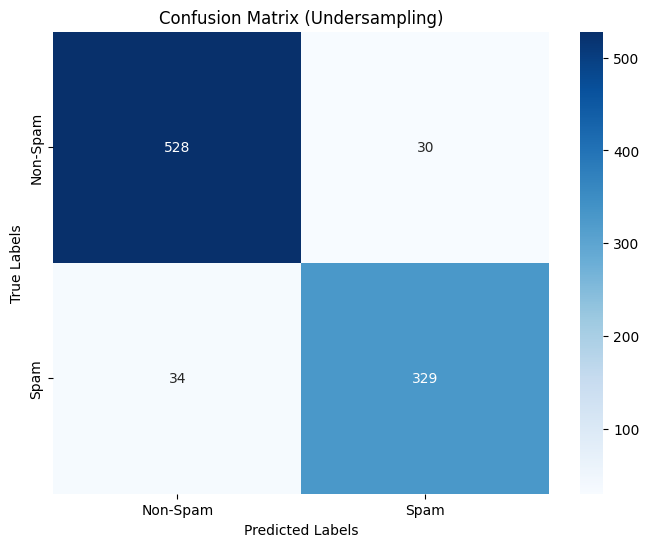

In [13]:
conf_matrix = confusion_matrix(Y_test, y_pred_undersampling)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Undersampling)')
plt.show()

## Save Results as CSV

In [14]:
predictions_df = pd.DataFrame({'Class': y_pred_undersampling})

predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'
